# Data Acquisition and Preprocessing:


Coversation of .mat and .hea extension to csv

In [ ]:
pip install wfdb

In [15]:
import wfdb
import os
import pandas as pd
from dateutil.parser import parse

In [16]:
wfdb_records_path =  r'C:\Users\Hassan Laptop Point\Downloads\WFDBRecords'

In [17]:
annotations_list = []

# Iterate through the directory structure
for root, dirs, files in os.walk(wfdb_records_path):
    for file in files:
        if file.endswith('.hea'):
            hea_file_path = os.path.join(root, file)
            record_name = os.path.splitext(file)[0]

            # Initialize annotation fields
            age, gender, snomed_codes = None, None, []

            # Parse .hea file to extract annotation information
            with open(hea_file_path, 'r') as f:
                for line in f:
                    if line.startswith('#'):
                        if 'Age' in line:
                            age = line.split(':')[-1].strip()
                        elif 'Sex' in line:  # Corrected to 'Sex' instead of 'Gender'
                            gender = line.split(':')[-1].strip()
                        elif 'Dx' in line:  # Corrected to 'Dx' instead of 'SNOMED CT Code'
                            dx = line.split(':')[-1].strip()
                            snomed_codes.extend(dx.split(','))  # Split multiple records and add to list

            # Append annotation information to list
            annotations_list.append({
                'RecordName': record_name,
                'Age': age,
                'Gender': gender,
                'Dx': '|'.join(snomed_codes)  # Join multiple records with a delimiter (e.g., '|')
            })

# Convert the list of annotations to DataFrame
df_annotations = pd.DataFrame(annotations_list)

# Get the path to the user's download folder
download_folder = os.path.expanduser('~\\Downloads')

# Specify the path to save the CSV file in the download folder
csv_filepath = os.path.join(download_folder, 'd_annotations.csv')

# Save the DataFrame to a CSV file in the download folder
df_annotations.to_csv(csv_filepath, index=False)

In [32]:
label=pd.read_csv('d_annotations.csv')
label.tail()


RecordName   Age  Gender                   Dx
45147    JS45547  34.0    Male            425856008
45148    JS45548  41.0  Female            425856008
45149    JS45549  36.0    Male            425856008
45150    JS45550  30.0  Female  233897008|425856008
45151    JS45551   6.0  Female            106068003

In [38]:
label['RecordName'].unique()
label['Age'].unique()
##label['Age'].replace( np.nan, inplace=True)


mean_age = label['Age'].mean()
label['Age'].fillna(mean_age, inplace=True)
# Fill NaN values with the mean value
##df['Age'].fillna(mean_age, inplace=True)
label['Age']=label['Age'].astype(int)
label['Age'].unique()

C:\Users\Hassan Laptop Point\AppData\Local\Temp\ipykernel_7344\4088177163.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  label['Age'].fillna(mean_age, inplace=True)


array([85, 59, 66, 73, 46, 80, 45, 47, 63, 77, 54, 74, 67, 51, 61, 68, 70,
       49, 81, 64, 71, 36, 87, 44, 60, 65, 52, 86, 48, 84, 72, 40, 62, 31,
       39, 30, 43, 58, 76, 20, 75, 89, 55, 57, 42, 88, 22, 56, 24, 29, 37,
       50, 53, 69, 79, 28, 14, 27, 21, 32, 34, 78, 33, 38, 23, 18, 82, 83,
       16,  4, 15, 35, 25, 41,  7, 13,  5, 26, 11,  9,  6, 19, 17, 12, 10,
        8,  0])

In [13]:
wfdb_records_path =  r'C://Users//Hassan Laptop Point//Downloads/WFDBRecords'
import os
import pandas as pd
import wfdb
from scipy.io import loadmat
import pandas as pd

# Specify the directory containing the WFDB record
# Specify the directory where CSV files will be saved
csv_folder_name = "ECG_Signal_CSV"
csv_records_path = os.path.join(os.path.expanduser("~//Downloads"), csv_folder_name)

# Create the CSV folder if it doesn't exist
os.makedirs(csv_records_path, exist_ok=True)

# Function to convert WFDB record to CSV
def convert_record_to_csv(record_path):
    record = wfdb.rdrecord(record_path, physical=False)
    data = record.d_signal
    columns = [f"Lead_{i+1}" for i in range(data.shape[1])]
    df = pd.DataFrame(data, columns=columns)
    return df

# Iterate through the directory structure
for root, dirs, files in os.walk(wfdb_records_path):
    for file in files:
        if file.endswith(".mat"):
            mat = loadmat("{0}//{1}".format(root,file))
            data = mat['val']
            df = pd.DataFrame(data.transpose())
            df.columns = ["Lead_1","Lead_2","Lead_3","Lead_4","Lead_5","Lead_6","Lead_7","Lead_8","Lead_9","Lead_10","Lead_11","Lead_12"]
            df.to_csv("C://Users//Hassan Laptop Point//Downloads//converted/{0}".format(file.replace(".mat",".csv")), index=False)



In [5]:
print(count)


from scipy.io import loadmat
import pandas as pd

def convert_mat_to_csv(mat_file_path, csv_file_path):
    mat = loadmat(mat_file_path)
    data = mat['val']
    df = pd.DataFrame(data.transpose())
    df.columns = ["Lead_1","Lead_2","Lead_3","Lead_4","Lead_5","Lead_6","Lead_7","Lead_8","Lead_9","Lead_10","Lead_11","Lead_12"]
      df.to_csv(csv_file_path, index=False)
convert_mat_to_csv("JS45300.mat", "converted_data.csv")

45152


# Dimensionality Reduction:

 Principal Component Analysis:-

In [86]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

file_path = r'C:\Users\Hassan Laptop Point\Downloads\patients_data1.csv'
df1 = pd.read_csv(file_path)



scaler = StandardScaler()
scaled_data = scaler.fit_transform(ecg_data)

pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_data)

output_shape = principal_components.shape
explained_variance_ratio = pca.explained_variance_ratio_
principal_df = pd.DataFrame(data=principal_components, columns=['Col_1', 'Col_2', 'Col_3','Col_4','Col_5','Col_6'])
# Save the principal components DataFrame to a CSV file
principal_df.to_csv('principal_components.csv', index=False)

print(f"Shape of the PCA-transformed data: {output_shape}")
print(f"Explained variance ratio of the principal components: {explained_variance_ratio}")

In [110]:
file_path = r'C:\Users\Hassan Laptop Point\Downloads\patients_data1.csv'
df1 = pd.read_csv(file_path)


In [119]:

df1 = df1.drop(columns=['Unnamed: 0'])
df1['Gender'] = df1['Gender'].replace({'Male': 0, 'Female': 1})
df1.head()

df1.to_csv('patients_data1.csv', index=False)
df1.head()

C:\Users\Hassan Laptop Point\AppData\Local\Temp\ipykernel_4696\671543336.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Gender'] = df1['Gender'].replace({'Male': 0, 'Female': 1})


Lead_1_mean  Lead_1_std  Lead_2_mean  Lead_2_std  Lead_3_mean  Lead_3_std  \
0     -61.1848  120.255582      -0.1198  112.324142      61.0608  139.667097   
1       2.4692   73.655238       5.3924  124.630727       2.9056  111.244003   
2       8.6470  141.660028     -14.7616  135.371264     -23.3600   78.385206   
3       2.5960  127.647019      -5.9326  144.395959      -8.5402   95.620859   
4       5.1692  121.008019       0.9182  113.925919      -4.2448   42.745904   

   Lead_4_mean  Lead_4_std  Lead_5_mean  Lead_5_std  ...  Lead_9_std  \
0      31.8608   93.150657     -62.2122  117.546101  ...  286.347973   
1      -2.7074   85.941893      -1.3982   70.851518  ...  186.691282   
2       4.0324  132.886003      15.0116   92.158199  ...  214.242887   
3       2.8892  127.637261       4.3832   86.635392  ...  609.518574   
4      -1.9552  115.525963       3.6758   70.689072  ...  162.807936   

   Lead_10_mean  Lead_10_std  Lead_11_mean  Lead_11_std  Lead_12_mean  \
0      -10.0686   268.845988      -10.2910   268.618348      -32.8058   
1       11.5976   163.631410        8.6538   175.876373        6.3084   
2      -13.1448   304.303345       10.5668   261.635749       18.1006   
3       -7.6864   578.292109       -1.4088   294.024248       -1.6250   
4      -13.2342   210.877627       -1.5098   199.657577       10.8356   

   Lead_12_std   Age  Gender                             Dx  
0   755.329672  85.0       0   164889003|59118001|164934002  
1   125.277790  59.0       1            426177001|164934002  
2   257.184495  66.0       0                      426177001  
3   165.105278  73.0       1  164890007|429622005|428750005  
4   185.373274  46.0       1                      426177001  

[5 rows x 27 columns]

In [120]:
#X = df1.drop(["Unnamed: 0","Gender","Dx"], axis=1)
##y = df1["Dx"]
# df1.columns
# Replace 'Male' with 0 and 'Female' with 1 in the 'Gender' column


In [124]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

file_path = r'C:\Users\Hassan Laptop Point\Downloads\patients_data.csv'
df1 = pd.read_csv(file_path)


df1['Gender'] = df1['Gender'].replace({'Male': 0, 'Female': 1})
df1.drop(columns=['Dx'], inplace=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_data)

output_shape = principal_components.shape
explained_variance_ratio = pca.explained_variance_ratio_
principal_df = pd.DataFrame(data=principal_components, columns=['Col_1', 'Col_2', 'Col_3', 'Col_4', 'Col_5', 'Col_6', 'Col_7', 'Col_8', 'Col_9', 'Col_10', 'Col_11', 'Col_12', 'Col_13', 'Col_14', 'Col_15', 'Col_16'])
# Save the principal components DataFrame to a CSV file
principal_df.to_csv('principal_components_final.csv', index=False)

print(f"Shape of the PCA-transformed data: {output_shape}")
print(f"Explained variance ratio of the principal components: {explained_variance_ratio}")

C:\Users\Hassan Laptop Point\AppData\Local\Temp\ipykernel_4696\1648374008.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Gender'] = df1['Gender'].replace({'Male': 0, 'Female': 1})


Shape of the PCA-transformed data: (9611, 16)
Explained variance ratio of the principal components: [0.21585272 0.14547756 0.0904514  0.0735951  0.07143801 0.04675137
 0.04176802 0.03730001 0.03711346 0.0356643  0.03284621 0.02911356
 0.02715962 0.02536494 0.02201696 0.0204879 ]


In [99]:
# X.Gender.unique()

# # # X.replace('Male', 1)
# # X.replace('Female', 0)

AttributeError: 'DataFrame' object has no attribute 'Gender'

In [100]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_data)

output_shape = principal_components.shape
explained_variance_ratio = pca.explained_variance_ratio_
principal_df = pd.DataFrame(data=principal_components, columns=['Col_1', 'Col_2', 'Col_3','Col_4','Col_5','Col_6'])
# Save the principal components DataFrame to a CSV file
principal_df.to_csv('principal_components.csv', index=False)

print(f"Shape of the PCA-transformed data: {output_shape}")
print(f"Explained variance ratio of the principal components: {explained_variance_ratio}")

ValueError: Shape of passed values is (9611, 15), indices imply (9611, 6)

In [101]:
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the directory paths
wfdb_records_path = r'C://Users//Hassan Laptop Point//Downloads//Patients'
transformed_dir = os.path.join(wfdb_records_path, 'transformed')

df_original = pd.read_csv(r'C://Users//Hassan Laptop Point//Downloads//d_annotations.csv')

# Create the "transformed" directory if it doesn't exist
os.makedirs(transformed_dir, exist_ok=True)

count = 0
patients = dict()
# Iterate through all CSV files in the directory
for file in os.listdir(wfdb_records_path):
    if file.endswith(".csv"):
        # Read the CSV file
        file_path = os.path.join(wfdb_records_path, file)
        ecg_data = pd.read_csv(file_path)
        # Calculate desired statistics for each column
        mean_values = ecg_data.mean().values
        std_values = ecg_data.std().values

        # Combine mean and standard deviation into a single list
        combined_values = [val for pair in zip(mean_values, std_values) for val in pair]
        patients[file.split(".")[0]]=combined_values
#         columns =["Lead_1_mean","Lead_1_std","Lead_2_mean","Lead_2_std","Lead_3_mean","Lead_3_std","Lead_4_mean","Lead_4_std""Lead_5_mean","Lead_5_std", "Lead_6_mean","Lead_6_std","Lead_7_mean","Lead_7_std","Lead_8_mean","Lead_8_std","Lead_9_mean","Lead_9_std","Lead_10_mean","Lead_10_std","Lead_11_mean","Lead_11_std","Lead_12_mean","Lead_12_std"]
#         df = pd.DataFrame(combined_values, columns=columns)
#         df.head()

        
    

In [67]:
# for i in patients:
#     print(patients[i])

[-61.1848, 120.25558169975308, -0.1198, 112.32414161932466, 61.0608, 139.6670973528719, 31.8608, 93.15065663926619, -62.2122, 117.54610069380296, 29.2386, 111.59772255909202, 170.7072, 369.3767449422078, 98.3054, 380.73570053985367, 19.6502, 286.34797305427963, -10.0686, 268.84598774589404, -10.291, 268.61834762788726, -32.8058, 755.3296715136337, 85.0, 'Male', '164889003|59118001|164934002', 85.0, 'Male', '164889003|59118001|164934002']
[2.4692, 73.65523790046458, 5.3924, 124.63072729418366, 2.9056, 111.24400268898478, -2.7074, 85.94189308502233, -1.3982, 70.85151815088268, 2.9138, 112.24507544187492, -0.0766, 108.72897465913162, 16.4008, 252.7156560245526, 7.2048, 186.6912820244073, 11.5976, 163.63140994902042, 8.6538, 175.876372617953, 6.3084, 125.2777897089459, 59.0, 'Female', '426177001|164934002', 59.0, 'Female', '426177001|164934002']
[8.647, 141.66002789672442, -14.7616, 135.37126372036366, -23.36, 78.38520554345455, 4.0324, 132.88600335707912, 15.0116, 92.1581992672298, -20.08

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [69]:
for j in patients:
    for i in range(len(df_original)):
        if df_original.loc[i, "RecordName"] == j:
            patients[j].append(df_original.loc[i, "Age"])
            patients[j].append(df_original.loc[i, "Gender"])
            patients[j].append(df_original.loc[i, "Dx"])
            break

In [70]:
patients["JS00001"]

[-61.1848,
 120.25558169975308,
 -0.1198,
 112.32414161932466,
 61.0608,
 139.6670973528719,
 31.8608,
 93.15065663926619,
 -62.2122,
 117.54610069380296,
 29.2386,
 111.59772255909202,
 170.7072,
 369.3767449422078,
 98.3054,
 380.73570053985367,
 19.6502,
 286.34797305427963,
 -10.0686,
 268.84598774589404,
 -10.291,
 268.61834762788726,
 -32.8058,
 755.3296715136337,
 85.0,
 'Male',
 '164889003|59118001|164934002']

In [74]:
columns =["Lead_1_mean","Lead_1_std","Lead_2_mean","Lead_2_std","Lead_3_mean","Lead_3_std","Lead_4_mean","Lead_4_std","Lead_5_mean","Lead_5_std", "Lead_6_mean","Lead_6_std","Lead_7_mean","Lead_7_std","Lead_8_mean","Lead_8_std","Lead_9_mean","Lead_9_std","Lead_10_mean","Lead_10_std","Lead_11_mean","Lead_11_std","Lead_12_mean","Lead_12_std", "Age", "Gender", "Dx"]


# data =list()
# for i in patients:
#     data.append(patients[i])
df = pd.DataFrame(data)

In [75]:
df.head()

0           1        2           3        4           5        6   \
0 -61.1848  120.255582  -0.1198  112.324142  61.0608  139.667097  31.8608   
1   2.4692   73.655238   5.3924  124.630727   2.9056  111.244003  -2.7074   
2   8.6470  141.660028 -14.7616  135.371264 -23.3600   78.385206   4.0324   
3   2.5960  127.647019  -5.9326  144.395959  -8.5402   95.620859   2.8892   
4   5.1692  121.008019   0.9182  113.925919  -4.2448   42.745904  -1.9552   

           7        8           9   ...          17       18          19  \
0   93.150657 -62.2122  117.546101  ...  286.347973 -10.0686  268.845988   
1   85.941893  -1.3982   70.851518  ...  186.691282  11.5976  163.631410   
2  132.886003  15.0116   92.158199  ...  214.242887 -13.1448  304.303345   
3  127.637261   4.3832   86.635392  ...  609.518574  -7.6864  578.292109   
4  115.525963   3.6758   70.689072  ...  162.807936 -13.2342  210.877627   

        20          21       22          23    24      25  \
0 -10.2910  268.618348 -32.8058  755.329672  85.0    Male   
1   8.6538  175.876373   6.3084  125.277790  59.0  Female   
2  10.5668  261.635749  18.1006  257.184495  66.0    Male   
3  -1.4088  294.024248  -1.6250  165.105278  73.0  Female   
4  -1.5098  199.657577  10.8356  185.373274  46.0  Female   

                              26  
0   164889003|59118001|164934002  
1            426177001|164934002  
2                      426177001  
3  164890007|429622005|428750005  
4                      426177001  

[5 rows x 27 columns]

In [76]:
df.columns= columns

In [77]:
df.shape

(9611, 27)

In [83]:
df.to_csv('patients_data1.csv') 

In [ ]:
def convert_to_single_row(df):
    # Calculate desired statistics for each column
    stats = df.agg(['mean', 'std', 'min', 'max'])
    
    # Flatten the DataFrame to a single row
    single_row = stats.unstack().to_frame().transpose()
    
    # Rename columns to reflect their statistics for clarity
    single_row.columns = [f'{col}_{stat}' for col, stat in single_row.columns]
    
    return single_row

# Convert the ECG data into a single row
single_row_summary = convert_to_single_row(ecg_data)

# Display the single row summary
print(single_row_summary)

In [136]:
import pandas as pd

# Load the main DataFrame containing the 'Dx' column
main_df = pd.read_csv('patients_data1.csv')

# Load the mapping DataFrame containing diagnosis code to name mappings
mapping_df = pd.read_csv('ConditionNames_SNOMED-CT.csv', encoding='latin-1')

# Create a dictionary mapping diagnosis codes to names
code_to_name = dict(zip(mapping_df['Snomed_CT'], mapping_df['Acronym Name']))

# Function to replace diagnosis codes with names, handling KeyError
def replace_with_name(code):
    return code_to_name.get(code, code)  # Use get() to handle missing keys

# Perform the lookup and replace the codes with names
main_df['Dx'] = main_df['Dx'].apply(lambda x: '|'.join(replace_with_name(code) for code in x.split('|')))

# Save the updated DataFrame to a new CSV file
main_df.to_csv('updated_main_data.csv', index=False)


PermissionError: [Errno 13] Permission denied: 'updated_main_data.csv'

In [ ]:
# import pandas as pd
import random

# Load the main DataFrame containing the 'Dx' column
main_df = pd.read_csv('updated_main_data.csv')
main_df['Gender'] = main_df['Gender'].replace({0: 'Male', 1: 'Female'})

# Load the mapping DataFrame containing diagnosis code to name mappings
mapping_df = pd.read_csv('ConditionNames_SNOMED-CT.csv', encoding='latin-1')

# Shuffle the mapping DataFrame to randomize the assignment
shuffled_mapping_df = mapping_df.sample(frac=1).reset_index(drop=True)

# Create a dictionary mapping diagnosis codes to names
code_to_name = dict(zip(shuffled_mapping_df['Snomed_CT'], shuffled_mapping_df['Acronym Name']))

# Function to replace diagnosis codes with randomly selected names
def replace_with_random_name(code):
    return random.choice(list(code_to_name.values()))

# Perform the lookup and replace the codes with randomly selected names
main_df['Dx'] = main_df['Dx'].apply(lambda x: '|'.join(replace_with_random_name(code) for code in x.split('|')))
main_df.head()
# Save the updated DataFrame to a new CSV file
##main_df.to_csv('updated_main_data_with_names_final.csv', index=False)


# Exploratory Data Analysis (EDA):


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9611 entries, 0 to 9610
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lead_1_mean   9611 non-null   float64
 1   Lead_1_std    9611 non-null   float64
 2   Lead_2_mean   9611 non-null   float64
 3   Lead_2_std    9611 non-null   float64
 4   Lead_3_mean   9611 non-null   float64
 5   Lead_3_std    9611 non-null   float64
 6   Lead_4_mean   9611 non-null   float64
 7   Lead_4_std    9611 non-null   float64
 8   Lead_5_mean   9611 non-null   float64
 9   Lead_5_std    9611 non-null   float64
 10  Lead_6_mean   9611 non-null   float64
 11  Lead_6_std    9611 non-null   float64
 12  Lead_7_mean   9611 non-null   float64
 13  Lead_7_std    9611 non-null   float64
 14  Lead_8_mean   9611 non-null   float64
 15  Lead_8_std    9611 non-null   float64
 16  Lead_9_mean   9611 non-null   float64
 17  Lead_9_std    9611 non-null   float64
 18  Lead_10_mean  9611 non-null 

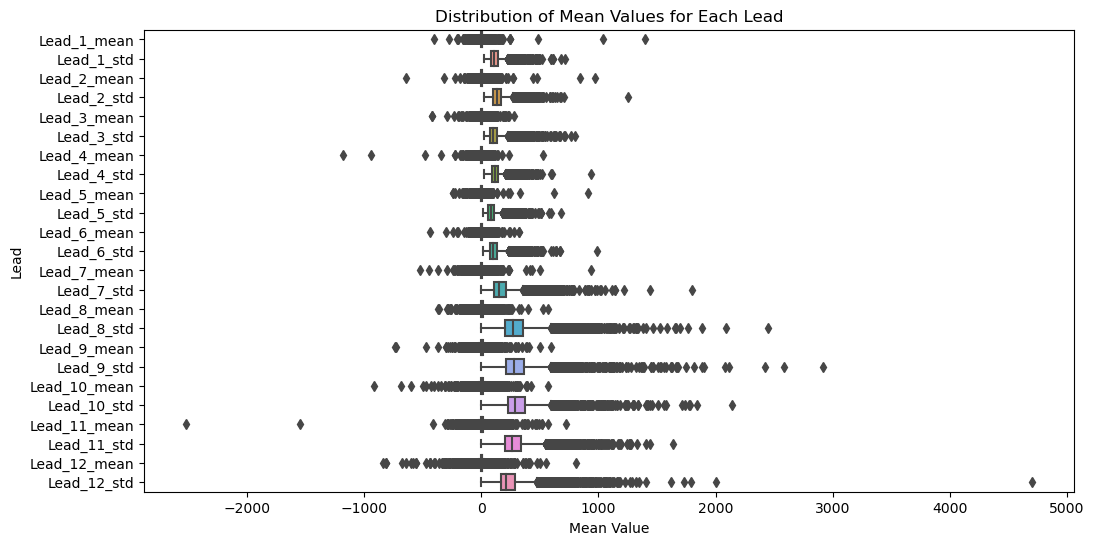

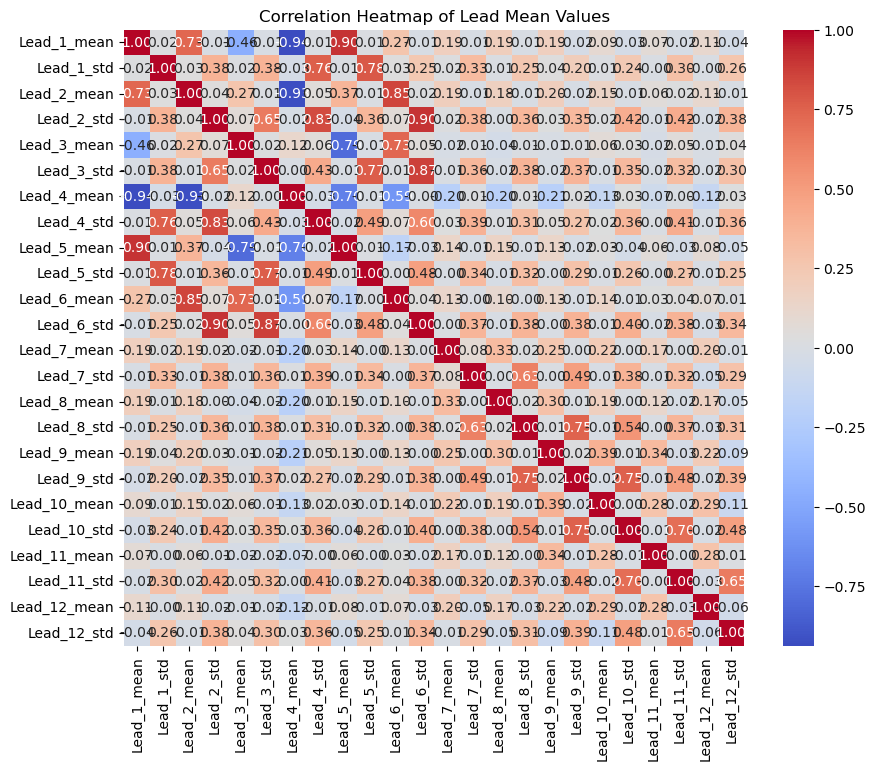

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'your_dataset.csv' with the actual filename
data = pd.read_csv('updated_main_data_with_names_final.csv')

# Display basic information about the dataset
print(data.info())

# Calculate summary statistics for mean values of the leads
lead_mean_summary = data.filter(like='Lead').mean()
print("Summary Statistics for Mean Values of the Leads:")
print(lead_mean_summary)

# Plot the distribution of mean values for each lead
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.filter(like='Lead'), orient='h')
plt.title('Distribution of Mean Values for Each Lead')
plt.xlabel('Mean Value')
plt.ylabel('Lead')
plt.show()

# Calculate correlation matrix
correlation_matrix = data.filter(like='Lead').corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Lead Mean Values')
plt.show()


In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'your_dataset.csv' with the actual filename
data = pd.read_csv('updated_main_data.csv')
data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


ValueError: could not convert string to float: '164889003|59118001|164934002'

SyntaxError: unterminated string literal (detected at line 31) (2307632047.py, line 31)

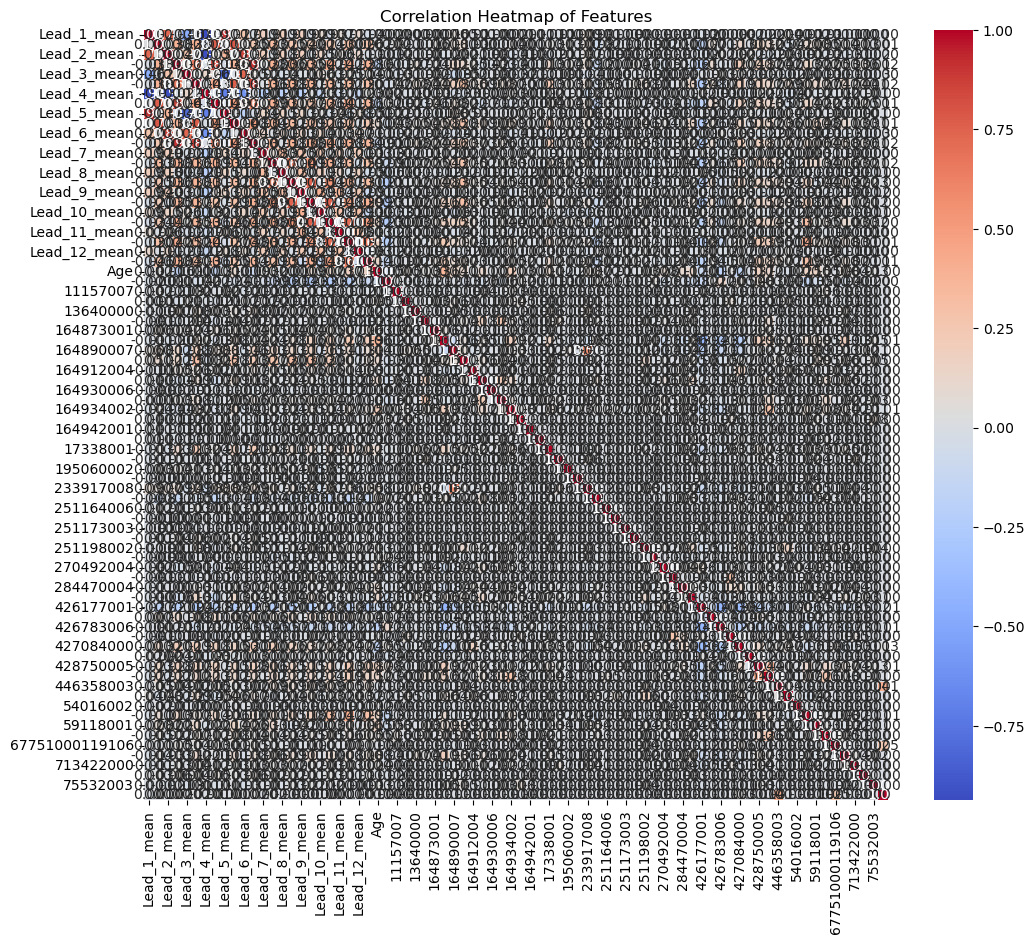

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('updated_main_data.csv')

# Split the diagnoses in the 'Dx' column and create dummy variables
diagnoses = data['Dx'].str.get_dummies(sep='|')

# Concatenate the dummy variables with the original dataset
data = pd.concat([data, diagnoses], axis=1)

# Drop the original 'Dx' column
data.drop('Dx', axis=1, inplace=True)

# Convert 'Gender' column to numerical values
data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})

# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


C:\Users\Hassan Laptop Point\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


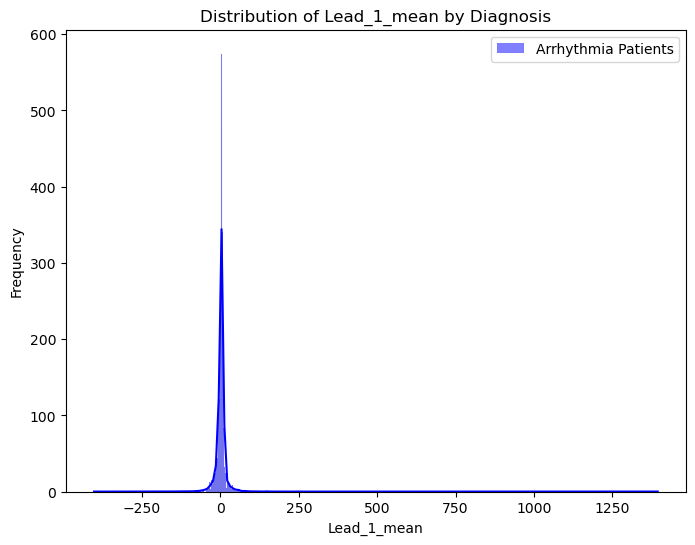

T-test for Lead_1_mean: t-statistic = nan, p-value = nan


C:\Users\Hassan Laptop Point\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


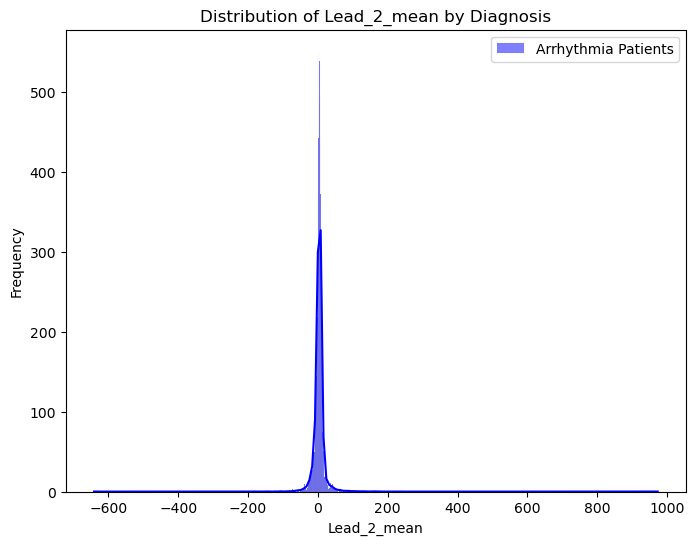

T-test for Lead_2_mean: t-statistic = nan, p-value = nan


C:\Users\Hassan Laptop Point\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


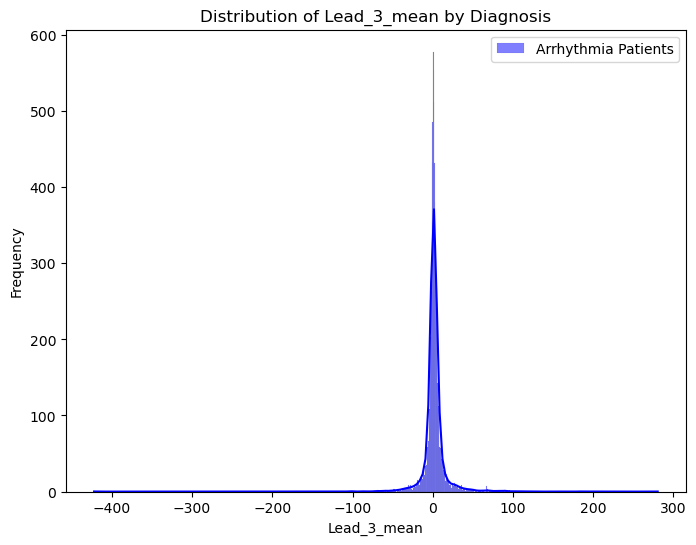

T-test for Lead_3_mean: t-statistic = nan, p-value = nan


C:\Users\Hassan Laptop Point\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


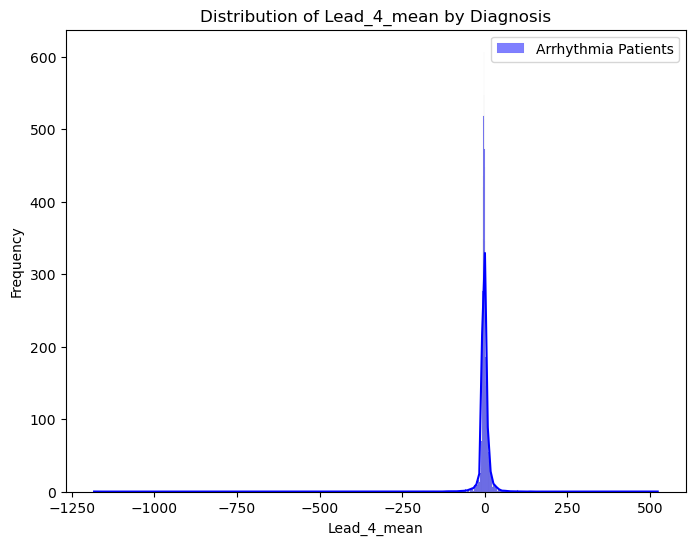

T-test for Lead_4_mean: t-statistic = nan, p-value = nan


C:\Users\Hassan Laptop Point\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


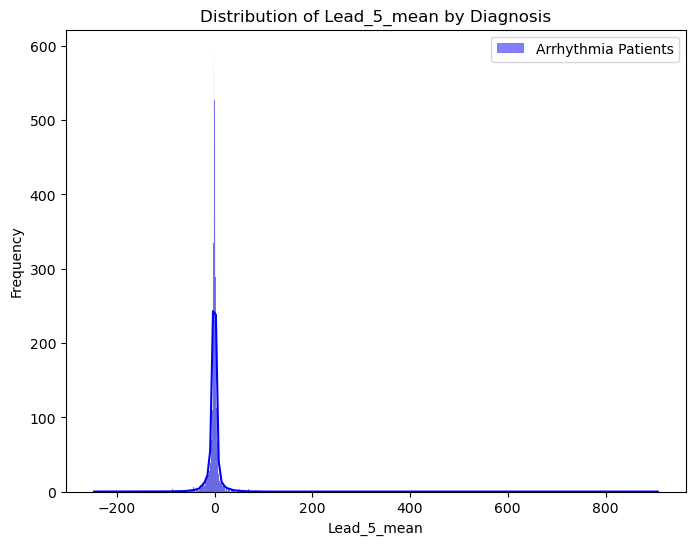

T-test for Lead_5_mean: t-statistic = nan, p-value = nan


In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the dataset
# Replace 'updated_main_data_with_names_final.csv' with the actual filename
data = pd.read_csv('updated_main_data_with_names_final.csv')

# Separate data into two groups based on Dx (arrhythmia diagnosis)
arrhythmia_patients = data[data['Dx'] != 'Normal']
normal_patients = data[data['Dx'] == 'Normal']

# List of relevant features to compare
relevant_features = ['Lead_1_mean', 'Lead_2_mean', 'Lead_3_mean', 'Lead_4_mean', 'Lead_5_mean']

# Visualize feature distributions for each group
for feature in relevant_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(arrhythmia_patients[feature], color='blue', label='Arrhythmia Patients', kde=True)
    sns.histplot(normal_patients[feature], color='orange', label='Normal Patients', kde=True)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Perform t-test to compare means
    t_stat, p_value = ttest_ind(arrhythmia_patients[feature], normal_patients[feature])
    print(f"T-test for {feature}: t-statistic = {t_stat}, p-value = {p_value}")


# Data Visualization

C:\Users\Hassan Laptop Point\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hassan Laptop Point\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hassan Laptop Point\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hassan Laptop Point\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

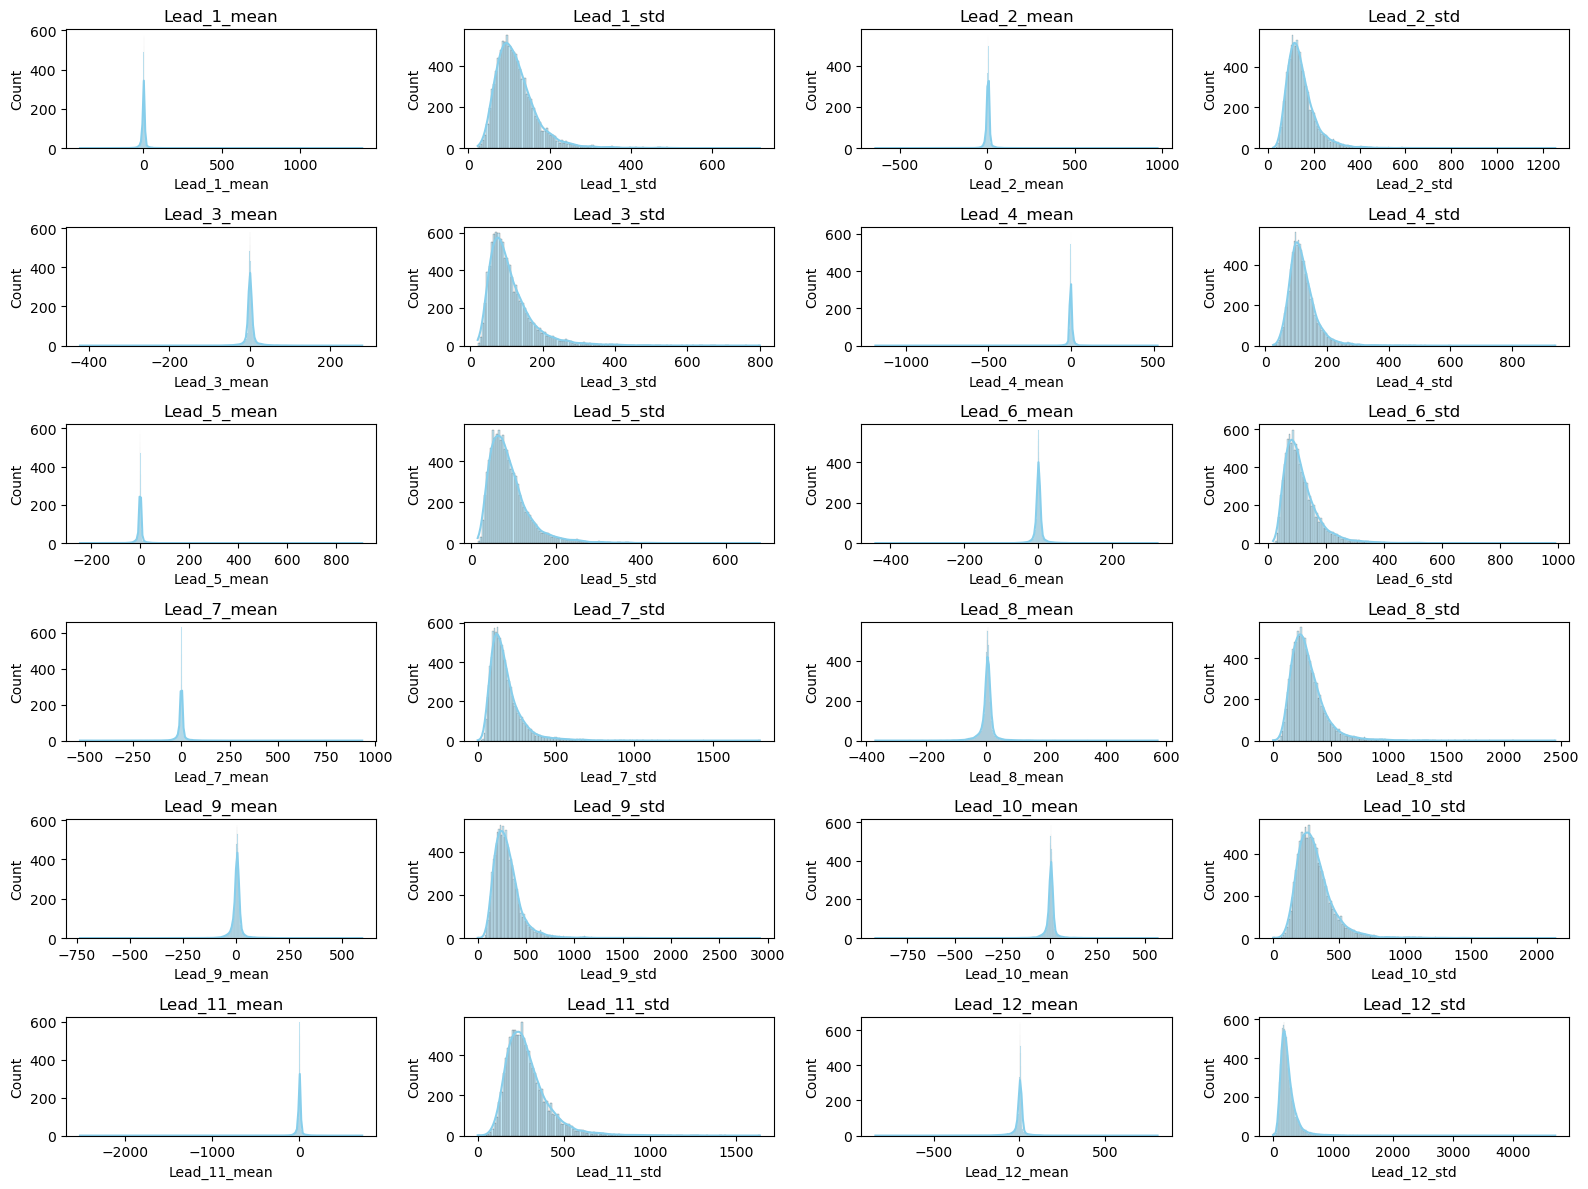

C:\Users\Hassan Laptop Point\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


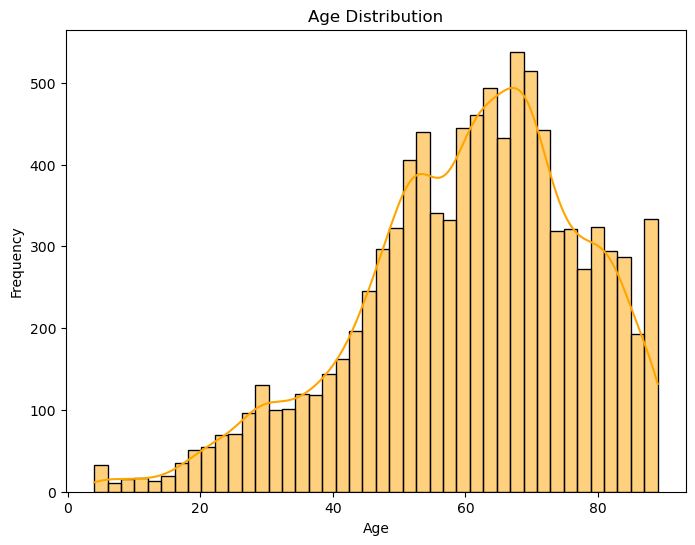

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'your_dataset.csv' with the actual filename
data = pd.read_csv('updated_main_data.csv')

# List of lead measurement features (mean and standard deviation)
lead_features = ['Lead_1_mean', 'Lead_1_std', 'Lead_2_mean', 'Lead_2_std',
                 'Lead_3_mean', 'Lead_3_std', 'Lead_4_mean', 'Lead_4_std',
                 'Lead_5_mean', 'Lead_5_std', 'Lead_6_mean', 'Lead_6_std',
                 'Lead_7_mean', 'Lead_7_std', 'Lead_8_mean', 'Lead_8_std',
                 'Lead_9_mean', 'Lead_9_std', 'Lead_10_mean', 'Lead_10_std',
                 'Lead_11_mean', 'Lead_11_std', 'Lead_12_mean', 'Lead_12_std']

# Create histograms for lead measurement features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(lead_features, start=1):
    plt.subplot(6, 4, i)
    sns.histplot(data[feature], kde=True, color='skyblue')
    plt.title(feature)
plt.tight_layout()
plt.show()

# Create histogram for age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, color='orange')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


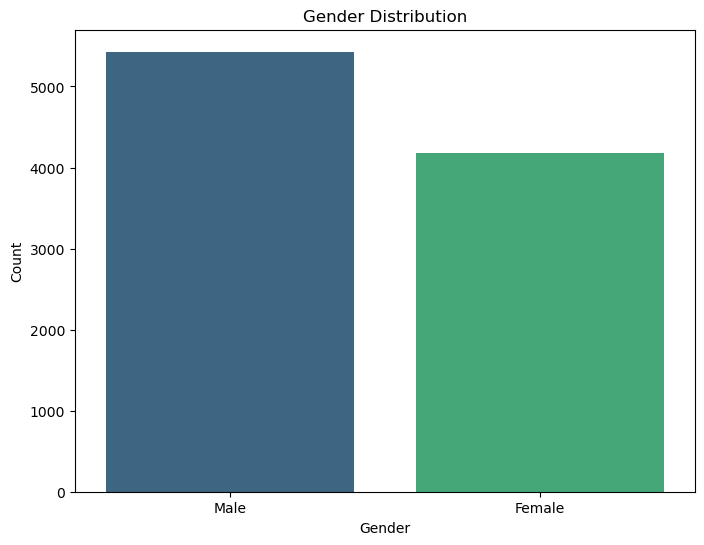

In [157]:
# Count the number of occurrences of each gender category
gender_counts = data['Gender'].value_counts()

# Create a bar plot for gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

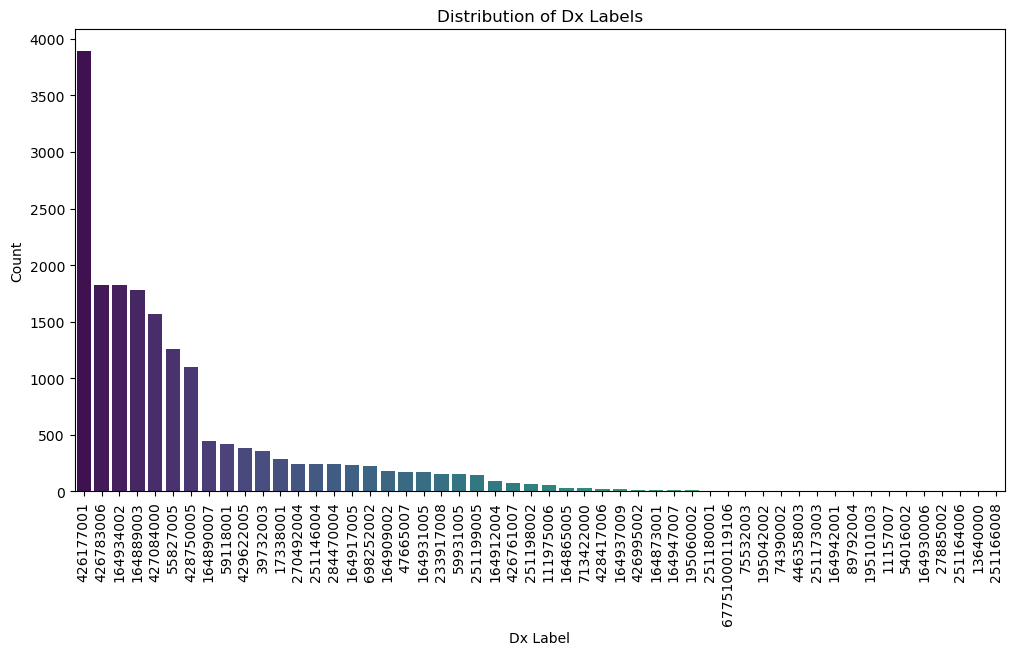

In [158]:
# Split the Dx column into individual labels
all_labels = '|'.join(data['Dx'].dropna()).split('|')

# Count the occurrences of each label
label_counts = pd.Series(all_labels).value_counts()

# Plot the distribution of Dx labels
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Dx Labels')
plt.xlabel('Dx Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

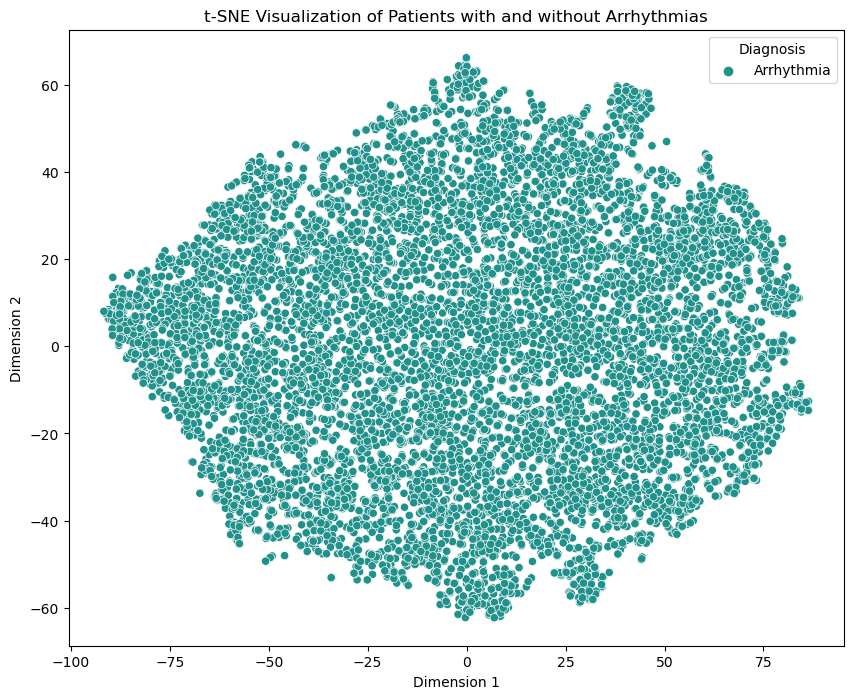

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load the dataset
# Replace 'your_dataset.csv' with the actual filename
data = pd.read_csv('updated_main_data.csv')

# Separate data into two groups based on Dx (arrhythmia diagnosis)
arrhythmia_patients = data[data['Dx'] != 'Normal']
normal_patients = data[data['Dx'] == 'Normal']

# Concatenate the two groups
all_patients = pd.concat([arrhythmia_patients, normal_patients], axis=0)

# Drop non-numeric columns and missing values
all_patients_numeric = all_patients.drop(['Dx', 'Gender'], axis=1).dropna()

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(all_patients_numeric)

# Create a DataFrame for visualization
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Dx'] = ['Arrhythmia' if idx < len(arrhythmia_patients) else 'Normal' for idx in range(len(all_patients))]

# Plot t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Dx', data=tsne_df, palette='viridis')
plt.title('t-SNE Visualization of Patients with and without Arrhythmias')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Diagnosis')
plt.show()
